# Analysez les ventes d'une librairie avec R ou Python
## Objectifs de la présentation :
### MISSION 1
#### 1. Une analyse des différents indicateurs et graphiques autour du chiffres d’affaires.
#### 2. L’evolution dans le temps et une decomposition en moyenne mobile pour évaluer la tendance globale.
#### 3. Faire un zoom sur les références, les tops, les flops, la repartition par catégorie.
### MISSION 2
#### 1. Une analyse plus ciblée sur les profils des clients. 
#### 2. La répartition du chiffre d’affaires entre clients via une courbe de Lorenz. 
#### 3. Regarder certaines correlations :
####   - Le lien entre genre d'un clients et les catégories des livres achetés
####   - Le lien entre l'âge des clients et le montant total des achats, la fréquence d'achat, la taille du panier moyen et les catégories des livres achetés.


In [1]:
#importer des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
#importer des dataframes
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

In [3]:
#Afficher les 5 premières lignes du data frame pour vérifier que les données sont bien chargées.
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
#Afficher les 5 dernières lignes du data frame pour vérifier que les données sont bien chargées.
customers.tail()

,client_id,sex,birth
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968
8622,c_84,f,1982


In [5]:
#Faire des statistiques 
customers.describe(include="all")

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [6]:
#Vérifier des valeurs manquantes
customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [7]:
#Déterminer les types de données
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [8]:
#Vérifier les types de données dans les colonnes et compter des valeurs non manquantes
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [9]:
#Vérifier des doublons dans le dataframe customers
customers.duplicated().sum()

0

In [10]:
#Vérifier des valeurs manquantes dans la colonne "client_id"
customers["client_id"].isna().sum()

0

In [11]:
#Vérifier des doublons dans la colonne "client_id"
customers["client_id"].duplicated().sum()

0

In [12]:
#Déterminer combien des lignes et des colonnes sont contenues dans le fichier
customers.shape

(8623, 3)

In [13]:
#Compter des nombres des 
customers.value_counts()

client_id  sex  birth
c_1        m    1955     1
c_6168     f    1977     1
c_6180     m    1957     1
c_618      m    1968     1
c_6179     m    1974     1
                        ..
c_3581     m    1966     1
c_3580     m    2004     1
c_358      f    1974     1
c_3579     m    1952     1
ct_1       m    2001     1
Length: 8623, dtype: int64

In [14]:
#lister des nombres de valeurs différentes au sein de dataframe customers
customers.nunique()

client_id    8623
sex             2
birth          76
dtype: int64

In [15]:
customers["birth"].unique()

array([1967, 1975, 1984, 1962, 1943, 1993, 1978, 1971, 1982, 1945, 2003,
       1959, 1977, 1954, 1987, 2000, 1992, 1963, 1958, 1994, 1936, 1986,
       1942, 1970, 1957, 1968, 2002, 2004, 1979, 1974, 1964, 1951, 1937,
       1981, 1965, 1960, 1996, 1983, 1990, 1955, 1988, 1991, 1972, 1980,
       1989, 1976, 1985, 1953, 1998, 1956, 1948, 1973, 1969, 1938, 1995,
       1952, 1949, 1999, 2001, 1939, 1950, 1966, 1935, 1941, 1961, 1997,
       1944, 1929, 1947, 1946, 1932, 1931, 1933, 1930, 1940, 1934])

In [16]:
#Afficher les 5 premières lignes du data frame pour vérifier que les données sont bien chargées.
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [17]:
#Afficher les 5 dernières lignes du data frame pour vérifier que les données sont bien chargées.
products.tail()

,id_prod,price,categ
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1
3286,0_1920,25.16,0


In [18]:
#Vérifier des valeurs manquantes
products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [19]:
#Compter des nombres de chaque products
products.value_counts()

id_prod  price   categ
0_0       3.75   0        1
0_899     19.99  0        1
0_89      14.99  0        1
0_890     2.81   0        1
0_891     21.99  0        1
                         ..
0_1987    6.99   0        1
0_1988    9.86   0        1
0_1989    3.99   0        1
0_199     8.99   0        1
T_0      -1.00   0        1
Length: 3287, dtype: int64

In [20]:
products.describe(include="all")

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [21]:
products['price'].isna().sum()

0

In [22]:
#Vérifier les types de données dans les colonnes et compter des valeurs non manquantes
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [23]:
#Afficher les types de l'ensemble des colonnes
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [24]:
#Vérifier des doublons dans le dataframe products
products.duplicated().sum()

0

In [25]:
#Vérifier des valeurs manquantes dans la colonnes "id_prod"
products["id_prod"].isna().sum()

0

In [26]:
#Vérifier des doublons dans la colonne "id_prod"
products["id_prod"].duplicated().sum()

0

In [27]:
#Déterminer combien des lignes et des colonnes sont contenues dans le fichier
products.shape

(3287, 3)

In [28]:
#Compter des nombres de valeurs différentes dans le dataframe products
products.nunique()

id_prod    3287
price      1455
categ         3
dtype: int64

In [29]:
#Lister des valeurs différentes au sein de colonne "categ"
products["categ"].unique()

array([0, 1, 2])

In [30]:
#Afficher les 5 premières lignes du data frame pour vérifier que les données sont bien chargées.
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [31]:
#Afficher les 5 dernières lignes du data frame pour vérifier que les données sont bien chargées.
transactions.tail()

,id_prod,date,session_id,client_id
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227
679531,1_523,2022-09-28 01:12:01.973763,s_274568,c_3873


In [32]:
#Faire des statistiques
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [33]:
#Vérifier des doublons dans le dataframe transactions
transactions.duplicated().sum()

126

In [34]:
#Vérifier des valeurs manquantes dans la colonne "id-prod"
transactions["id_prod"].isna().sum()

0

In [35]:
#Vérifier des doublons dans la colonne "id_prod"
transactions["id_prod"].duplicated().sum()

676265

In [36]:
#Déterminer les nombres des lignes et des colonnes sont contenues dans le fichier
transactions.shape

(679532, 4)

In [37]:
#Compter les nombres de transactions
transactions.value_counts()

id_prod  date                             session_id  client_id
T_0      test_2021-03-01 02:30:02.237413  s_0         ct_0         9
         test_2021-03-01 02:30:02.237446  s_0         ct_0         6
         test_2021-03-01 02:30:02.237428  s_0         ct_0         6
         test_2021-03-01 02:30:02.237414  s_0         ct_1         5
         test_2021-03-01 02:30:02.237412  s_0         ct_1         5
                                                                  ..
0_1486   2021-10-19 10:55:26.309106       s_107043    c_8574       1
         2021-10-19 19:40:46.255072       s_107217    c_8081       1
         2021-10-20 09:35:53.715307       s_107500    c_6820       1
         2021-10-21 16:10:11.944606       s_108097    c_459        1
T_0      test_2021-03-01 02:30:02.237450  s_0         ct_0         1
Length: 679406, dtype: int64

In [38]:
#Vérifier des valeurs manquantes par colonnes
transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [39]:
#Afficher des types de l'ensemble des colonnes
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [40]:
#Afficher des types de l'ensemble des colonnes et compter des valeurs non manquantes
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [41]:
#Compter des nombres de valeurs différentes dans le dataframe transactions
transactions.nunique()

id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

In [42]:
#Joindre les 3 dataframes
df=products.merge(transactions,how='left',on='id_prod').merge(customers,on='client_id',how='inner')
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991


In [43]:
#Faire des statistiques rapides sur le prix
df['price'].describe()

count    679311.000000
mean         17.449340
std          18.329034
min          -1.000000
25%           8.820000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [44]:
#Sélectionner des prix négatifs
df[df['price']<0]

,id_prod,price,categ,date,session_id,client_id,sex,birth
674494,T_0,-1.0,0,test_2021-03-01 02:30:02.237419,s_0,ct_0,f,2001
674495,T_0,-1.0,0,test_2021-03-01 02:30:02.237425,s_0,ct_0,f,2001
674496,T_0,-1.0,0,test_2021-03-01 02:30:02.237436,s_0,ct_0,f,2001
674497,T_0,-1.0,0,test_2021-03-01 02:30:02.237430,s_0,ct_0,f,2001
674498,T_0,-1.0,0,test_2021-03-01 02:30:02.237449,s_0,ct_0,f,2001
...,...,...,...,...,...,...,...,...
674689,T_0,-1.0,0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001
674690,T_0,-1.0,0,test_2021-03-01 02:30:02.237427,s_0,ct_1,m,2001
674691,T_0,-1.0,0,test_2021-03-01 02:30:02.237449,s_0,ct_1,m,2001
674692,T_0,-1.0,0,test_2021-03-01 02:30:02.237424,s_0,ct_1,m,2001


In [45]:
#Filtrer des prix négatifs < 0
df=df[df['price']>=0]
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991


In [46]:
#Changer le format de date 
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [47]:
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991


In [48]:
#Convertir la date
df['date']=df['date'].dt.date

In [49]:
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991


In [50]:
#Convertir des dates en mois
df['month_year']=pd.to_datetime(df['date']).dt.to_period('M')

In [51]:
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,month_year
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10
2,0_2131,8.99,0,2021-10-09,s_102458,c_6389,f,1991,2021-10
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07


In [52]:
#Convertir des dates en années
df['year']=pd.DatetimeIndex(df['date']).year

In [53]:
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,month_year,year
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02,2022
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10,2022
2,0_2131,8.99,0,2021-10-09,s_102458,c_6389,f,1991,2021-10,2021
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04,2021
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07,2021


In [54]:
#Calculer des âges de clients
df['age']=df['year']-df['birth']

In [55]:
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,month_year,year,age
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02,2022,31
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10,2022,31
2,0_2131,8.99,0,2021-10-09,s_102458,c_6389,f,1991,2021-10,2021,30
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04,2021,30
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07,2021,30


In [56]:
#Faire des statistiques rapides
df.describe(include='all')

,id_prod,price,categ,date,session_id,client_id,sex,birth,month_year,year,age
count,679111,679111.000000,679111.000000,679111,679111,679111,679111,679111.000000,679111,679111.000000,679111.000000
unique,3265,NaN,NaN,730,342275,8600,2,NaN,24,NaN,NaN
top,1_369,NaN,NaN,2022-11-30,s_118668,c_1609,m,NaN,2021-09,NaN,NaN
freq,2252,NaN,NaN,1311,14,25488,340826,NaN,33314,NaN,NaN
mean,NaN,17.454773,0.441953,NaN,NaN,NaN,NaN,1977.811149,NaN,2021.670503,43.859354
std,NaN,18.328998,0.595042,NaN,NaN,NaN,NaN,13.575361,NaN,0.617562,13.591033
min,NaN,0.620000,0.000000,NaN,NaN,NaN,NaN,1929.000000,NaN,2021.000000,17.000000
25%,NaN,8.870000,0.000000,NaN,NaN,NaN,NaN,1970.000000,NaN,2021.000000,35.000000
50%,NaN,13.990000,0.000000,NaN,NaN,NaN,NaN,1980.000000,NaN,2022.000000,42.000000
75%,NaN,18.990000,1.000000,NaN,NaN,NaN,NaN,1987.000000,NaN,2022.000000,51.000000


In [57]:
#Vérifier des valeurs manquantes
df.isna().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
month_year    0
year          0
age           0
dtype: int64

In [58]:
#Afficher des colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679310
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype    
---  ------      --------------   -----    
 0   id_prod     679111 non-null  object   
 1   price       679111 non-null  float64  
 2   categ       679111 non-null  int64    
 3   date        679111 non-null  object   
 4   session_id  679111 non-null  object   
 5   client_id   679111 non-null  object   
 6   sex         679111 non-null  object   
 7   birth       679111 non-null  int64    
 8   month_year  679111 non-null  period[M]
 9   year        679111 non-null  int64    
 10  age         679111 non-null  int64    
dtypes: float64(1), int64(4), object(5), period[M](1)
memory usage: 62.2+ MB


## Analysez des différents indicateurs et graphiques autour du chiffres d’affaires. 

In [59]:
#Calculer le total chiffres d'affaires
CA=round(df['price'].sum(),2)
CA

11853728.68

In [60]:
#Calculer des chiffres d'affaires mensuelle 
CA_mensuelle=df.groupby('month_year').price.sum().reset_index()
CA_mensuelle

,month_year,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


<AxesSubplot:xlabel='categ', ylabel='price'>

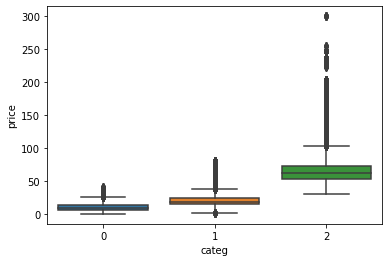

In [61]:
#Afficher des valeurs aberrantes pour les 3 catégories
sns.boxplot( x=df["categ"], y=df["price"], data=df)

In [62]:
#Ecrire une fonction qui va lister les prix considérées comme des outliers
data_outliers=pd.DataFrame([])

def box_outliers(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    mask=(series<Q1-1.5*IQR)|(series>Q3+1.5*IQR)
    series=series[mask]
    return series


In [63]:
#Chercher des outliers pour chaque catégorie
for i in df.copy().categ.unique():    
    df_outlier = df.copy().sort_values(['categ'])
    df_outlier = df_outlier.loc[df_outlier['categ']==i,:].reset_index(drop=True)
    df_outlier = df_outlier[['categ','price']].set_index('categ').apply(box_outliers)
    df_outlier = df_outlier.reset_index()
    data_outliers = data_outliers.append(df_outlier)

/var/folders/ff/46z7kp5x47l47x9jhyp0dd940000gn/T/ipykernel_1954/4065113197.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_outliers = data_outliers.append(df_outlier)
/var/folders/ff/46z7kp5x47l47x9jhyp0dd940000gn/T/ipykernel_1954/4065113197.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_outliers = data_outliers.append(df_outlier)
/var/folders/ff/46z7kp5x47l47x9jhyp0dd940000gn/T/ipykernel_1954/4065113197.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_outliers = data_outliers.append(df_outlier)


In [64]:
#Lister tous des outliers
data_outliers.reset_index(drop=True)

,categ,price
0,0,29.99
1,0,28.57
2,0,28.57
3,0,26.99
4,0,28.99
...,...,...
11940,2,115.93
11941,2,157.42
11942,2,157.42
11943,2,145.99


In [65]:
#Afficher des outliers pour le 'categ' 0
data_outliers[data_outliers['categ']==0]

,categ,price
0,0,29.99
1,0,28.57
2,0,28.57
3,0,26.99
4,0,28.99
...,...,...
842,0,37.99
843,0,37.99
844,0,37.99
845,0,29.99


In [66]:
#Afficher des outliers pour le 'categ' 1
data_outliers[data_outliers['categ']==1]

,categ,price
0,1,58.54
1,1,58.54
2,1,40.06
3,1,40.06
4,1,40.99
...,...,...
4589,1,52.03
4590,1,45.99
4591,1,78.83
4592,1,45.99


In [67]:
#Afficher des outliers pour le'categ' 2
data_outliers[data_outliers['categ']==2]

,categ,price
0,2,103.99
1,2,195.99
2,2,145.99
3,2,247.22
4,2,103.99
...,...,...
6499,2,115.93
6500,2,157.42
6501,2,157.42
6502,2,145.99


## L’evolution dans le temps et une decomposition en moyenne mobile pour évaluer la tendance globale. 

In [68]:
#Transformer le type de 'month_year' en format adéquate
df['month_year'] = df['month_year'].astype(str)

In [69]:
#Afficher des types des données dans les colonnes
CA_mensuelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   month_year  24 non-null     period[M]
 1   price       24 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 512.0 bytes


In [70]:
#Transformer le type de 'month_year' en format adéquate
CA_mensuelle['month_year'] = CA_mensuelle['month_year'].astype(str)

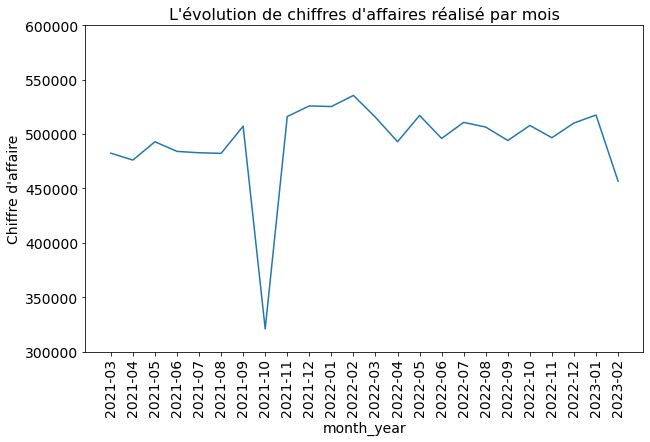

In [71]:
#Tracer le graphique de l'évolution de chiffres d'affaires réalisé par mois
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size':14})
plt.plot(CA_mensuelle['month_year'],CA_mensuelle['price'])
plt.title("L'évolution de chiffres d'affaires réalisé par mois", fontsize=16)
plt.ylabel("Chiffre d'affaire")
plt.xlabel("month_year",loc='center')
plt.ylim(300000,600000)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [72]:
#Calculer des chiffres d'affaires par mois pour les 3 catégories
sum_CA=df.groupby(['categ','month_year'])['price'].sum().reset_index()
sum_CA

,categ,month_year,price
0,0,2021-03,193629.17
1,0,2021-04,205222.46
2,0,2021-05,196186.72
3,0,2021-06,167943.15
4,0,2021-07,144750.79
...,...,...,...
67,2,2022-10,120878.94
68,2,2022-11,111642.60
69,2,2022-12,123803.09
70,2,2023-01,126153.08


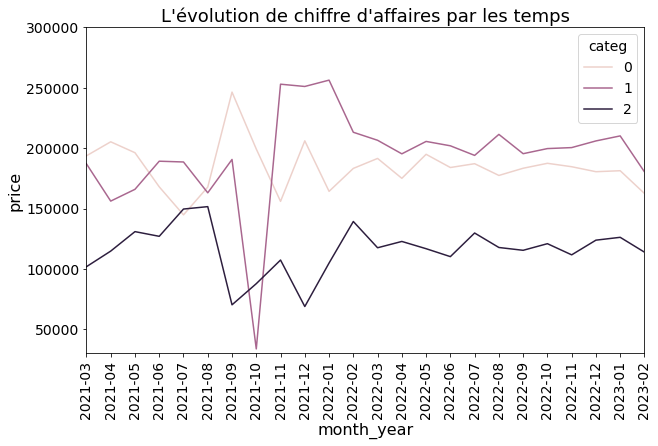

In [73]:
#Créer jeu de données pour toutes les valeurs 
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size':14})

#Loop on the values
for categ in sum_CA['categ'].unique():
    sum_CA=df.groupby(by=['categ','month_year'])['price'].sum().reset_index()
    
#Générer le ligne plot
sns.lineplot(data=sum_CA,x=sum_CA['month_year'],y=sum_CA['price'],hue = 'categ',estimator=sum)
plt.title("L'évolution de chiffre d'affaires par les temps", fontsize=18)
plt.xlabel('month_year', fontsize=16)
plt.ylabel('price',fontsize=16)
plt.ylim(30000,300000)
plt.xlim('2021-03','2023-02')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [74]:
#Explication de la diminution des chiffres d'affaires pour 'categ' 1 en mois octobre 2021
df1=df[df['categ']==1]

In [75]:
#Sélectionner le mois d'octobre 2021
df1=df1[df1['month_year']=='2021-10']

In [76]:
#Compter des nombres d'achats réalisé en octobre 2021
df1.date.value_counts()

2021-10-01    344
2021-10-31    342
2021-10-30    338
2021-10-29    326
2021-10-28    316
Name: date, dtype: int64

In [77]:
#Calculer la moyenne mobile
moving_avg =df.set_index('month_year').groupby('categ')['price'].rolling(window=3).mean()
moving_avg =pd.DataFrame(moving_avg)
moving_avg

price
categ month_year           
0     2022-02           NaN
      2022-10           NaN
      2021-10     16.323333
      2021-04     15.323333
      2021-07      9.270000
...                     ...
2     2022-01     68.990000
      2021-07     67.323333
      2022-12     65.656667
      2022-10     63.990000
      2022-03     63.990000

[679111 rows x 1 columns]

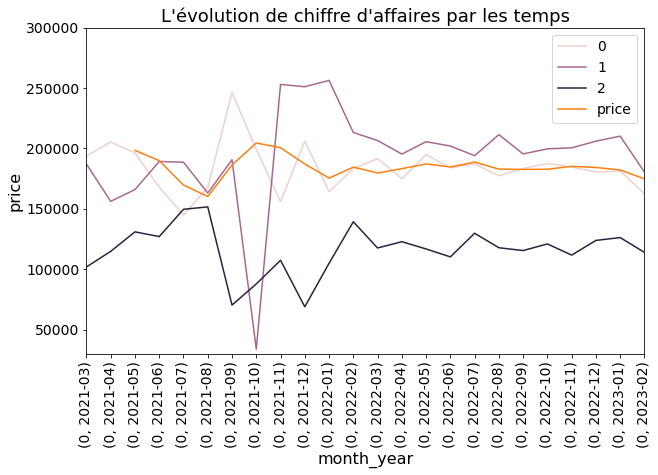

In [78]:
#Créer jeu de données pour toutes les valeurs 
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size':14})

#Loop on the values
for categ in df['categ'].unique():
    sum_CA=df.groupby(by=['categ','month_year'])['price'].sum().reset_index()
    
#Générer le ligne plot
sns.lineplot(data=sum_CA,x=sum_CA['month_year'],y=sum_CA['price'],hue = 'categ',estimator=sum)
mov_avg =sum_CA.set_index('month_year').groupby('categ')['price'].rolling(window=3).mean().plot()
plt.title("L'évolution de chiffre d'affaires par les temps", fontsize=18)
plt.xlabel('month_year', fontsize=16)
plt.ylabel('price',fontsize=16)
plt.ylim(30000,300000)
plt.xlim('2021-03','2023-02')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.legend(loc='best')
plt.show()

## Faire un zoom sur les références, les tops, les flops, la repartition par catégorie.

In [79]:
#Compter des valeurs de chaque 'categ'
quantite_categ=df['categ'].value_counts()
quantite_categ

0    415459
1    227169
2     36483
Name: categ, dtype: int64

<AxesSubplot:>

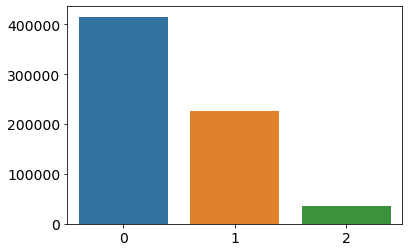

In [80]:
#Tracer barplot pour les 3 catégories
sns.barplot(x=quantite_categ.index, y=quantite_categ.values)

In [81]:
#Calculer des chiffres d'affaires des chaque catégorie
df_CA = df.groupby('categ')['price'].sum()
df_CA.sort_values(ascending=False).reset_index()


,categ,price
0,1,4653722.69
1,0,4419730.97
2,2,2780275.02


In [82]:
#Calculer des valeurs les moyenne, min et max de prix
stat_price=df.groupby('categ').agg({'price':['mean','min','max']})
stat_price

price               
            mean    min     max
categ                          
0      10.638188   0.62   40.99
1      20.485730   2.00   80.99
2      76.207412  30.99  300.00

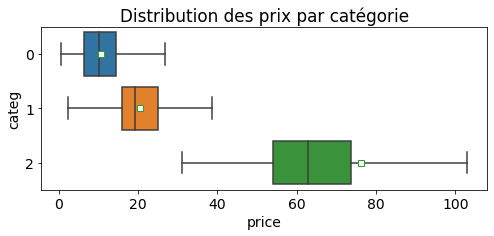

In [83]:
#Les moyenne des prix par chaque catégorie
plt.figure(figsize=(8,3))
sns.boxplot(data=df, y='categ', x='price', orient='h', showfliers=False, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par catégorie')
plt.show()

In [84]:
print (f'La moyenne de categ 2 est à l\'écart de la médiane donc la distribution est asymétrique')

La moyenne de categ 2 est à l'écart de la médiane donc la distribution est asymétrique


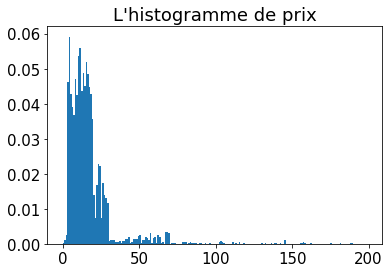

In [85]:
#Distribution des prix
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update ({'font.size':15})
plt.hist(df['price'],bins=range(0,200),density=True)
plt.title("L'histogramme de prix")
plt.show()

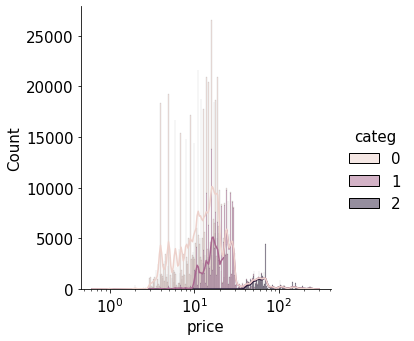

In [86]:
#Distribution de prix par les 3 catégories
sns.displot(df,x="price",hue="categ",multiple="stack",kde=True, log_scale=True);
plt.show()

0
moy:
 10.638188052306027
med:
 9.99
mod:
 0    4.99
Name: price, dtype: float64
var:
 24.339633089385742
ect:
 4.933521368088492
skw:
 0.4223663221053796
kur:
 -0.38755488169415075


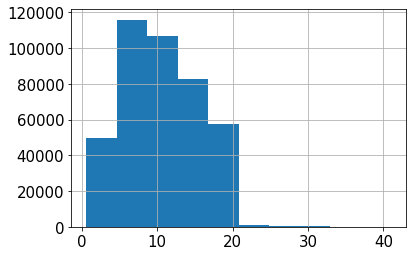

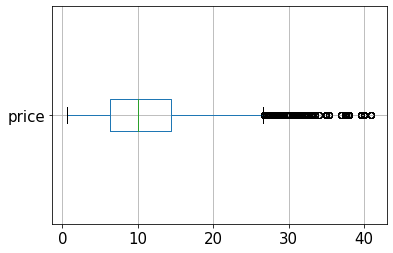

1
moy:
 20.485729523017916
med:
 19.08
mod:
 0    15.99
Name: price, dtype: float64
var:
 57.53035707569797
ect:
 7.584876866218592
skw:
 1.734237258116207
kur:
 8.164115605848027


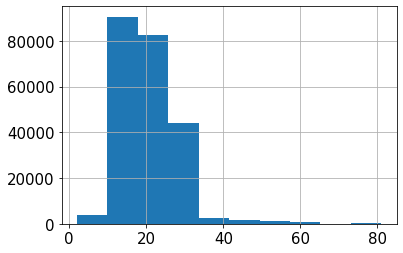

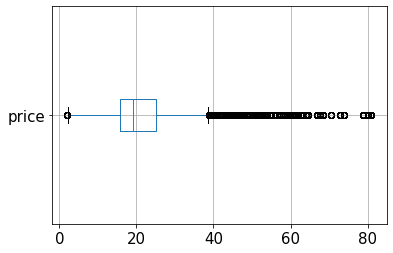

2
moy:
 76.20741221941809
med:
 62.83
mod:
 0    68.99
Name: price, dtype: float64
var:
 1579.9408534984411
ect:
 39.74846982587432
skw:
 2.1835172974115054
kur:
 4.817061548670196


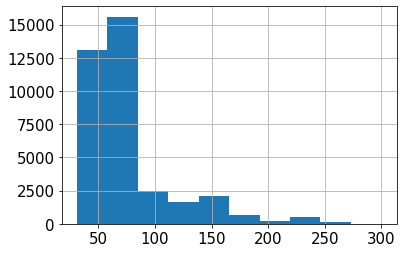

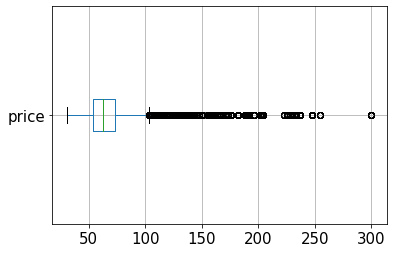

In [87]:
#Faire les statistiques détaillées pour les 3 'categ'
for cat in df["categ"].unique():
    subset = df[df.categ == cat]
    print(cat)
    print("moy:\n",subset['price'].mean())
    print("med:\n",subset['price'].median())
    print("mod:\n",subset['price'].mode())
    print("var:\n",subset['price'].var(ddof=0))
    print("ect:\n",subset['price'].std(ddof=0))
    print("skw:\n",subset['price'].skew())
    print("kur:\n",subset['price'].kurtosis())
    subset["price"].hist()
    plt.show()
    subset.boxplot(column="price", vert=False)
    plt.show()


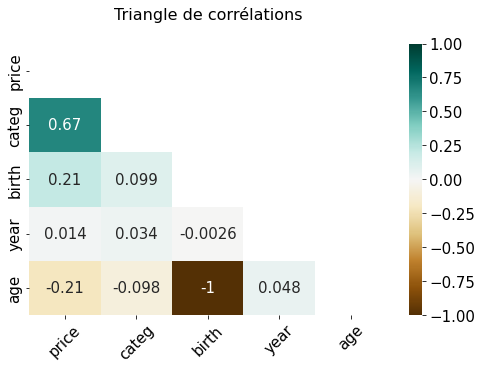

In [88]:
# Triangle de corrélations
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr(), dtype=bool)), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle de corrélations', fontdict={'fontsize':16}, pad=24)
plt.xticks(rotation=45)
plt.show()

## Une analyse plus ciblée sur les profils des clients. 

In [89]:
#Catégoriser des chiffres d'affaires par genre de clients
sex_agreg=df.groupby('sex')['price'].sum()
sex_agreg

sex
f    5859683.13
m    5994045.55
Name: price, dtype: float64

In [90]:
#Désagréger des clients par un comptage
sex_agreg=df['sex'].value_counts()
sex_agreg

m    340826
f    338285
Name: sex, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

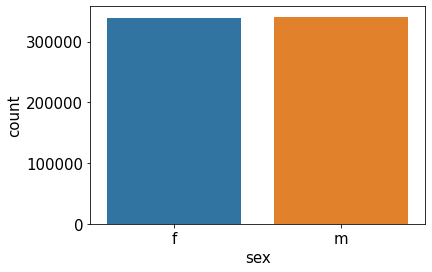

In [91]:
#Tracer des désagrégation des clients par barplot
sns.countplot(df.sex)

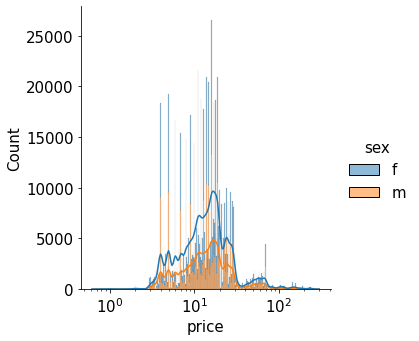

In [92]:
#Distribution de prix par le genre de clients
sns.displot(df,x="price",hue="sex",multiple="stack", kde=True, log_scale=True);
plt.show()

In [93]:
#Discrétiser la variable 'age' en 5 sous-groupes et stocker dans une nouvelle variable appelée 'class_age'
df['class_age']=pd.qcut(df['age'],5,duplicates='drop')
df['class_age']

0         (16.999, 33.0]
1         (16.999, 33.0]
2         (16.999, 33.0]
3         (16.999, 33.0]
4         (16.999, 33.0]
               ...      
679306    (16.999, 33.0]
679307    (16.999, 33.0]
679308    (16.999, 33.0]
679309    (16.999, 33.0]
679310    (16.999, 33.0]
Name: class_age, Length: 679111, dtype: category
Categories (5, interval[float64, right]): [(16.999, 33.0] < (33.0, 40.0] < (40.0, 45.0] < (45.0, 54.0] < (54.0, 94.0]]

In [94]:
#Afficher les sous-groupes de class_age
df['class_age'].cat.categories

IntervalIndex([(16.999, 33.0], (33.0, 40.0], (40.0, 45.0], (45.0, 54.0], (54.0, 94.0]], dtype='interval[float64, right]')

In [95]:
#Discrétiser la variable 'price' en 5 sous-groupes et stocker dans une nouvelle variable appelée 'class_price'
df['class_price']=pd.qcut(df['price'],5, duplicates='drop')
df['class_price']

0         (15.99, 20.99]
1         (15.99, 20.99]
2          (7.43, 11.86]
3         (15.99, 20.99]
4          (0.619, 7.43]
               ...      
679306    (20.99, 300.0]
679307    (20.99, 300.0]
679308    (20.99, 300.0]
679309    (20.99, 300.0]
679310    (20.99, 300.0]
Name: class_price, Length: 679111, dtype: category
Categories (5, interval[float64, right]): [(0.619, 7.43] < (7.43, 11.86] < (11.86, 15.99] < (15.99, 20.99] < (20.99, 300.0]]

In [96]:
#A l'aide de tableau croisé des variables 'client_age' et 'prod_price',vérifier s'il y a une influence d'âge sur le prix 
cross_age_price=pd.crosstab(df['class_age'], df['class_price'])
cross_age_price


class_price,"(0.619, 7.43]","(7.43, 11.86]","(11.86, 15.99]","(15.99, 20.99]","(20.99, 300.0]"
class_age,,,,,
"(16.999, 33.0]",20443,21413,23896,21587,52544
"(33.0, 40.0]",34899,33326,32841,25955,15159
"(40.0, 45.0]",33719,31590,31250,24242,14216
"(45.0, 54.0]",28369,28126,30448,26500,21725
"(54.0, 94.0]",18413,21347,27832,27699,31572


Les moins de 33ans ont acheté des livres les plus chers

### Créer quelques variables additionnelles : des nombres d'achats et des montants d'achats 

In [97]:
#Créer et ajouter la colonne de nombre d'achats
df = df.merge(
    df.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'nombre_achats'}),
    how='left', on='client_id')
df.sample(3)

,id_prod,price,categ,date,session_id,client_id,sex,birth,month_year,year,age,class_age,class_price,nombre_achats
169043,1_616,29.02,1,2022-01-02,s_143801,c_4958,m,1999,2022-01,2022,23,"(16.999, 33.0]","(20.99, 300.0]",5195
171173,2_41,68.99,2,2021-10-11,s_103142,c_4958,m,1999,2021-10,2021,22,"(16.999, 33.0]","(20.99, 300.0]",5195
459054,0_1766,4.55,0,2021-03-27,s_12242,c_5043,f,1971,2021-03,2021,50,"(45.0, 54.0]","(0.619, 7.43]",153


In [98]:
#Créer et ajouter la colonne de montant d'achats
df = df.merge(
    df.pivot_table(
    index='client_id', values='price', 
    aggfunc='sum').reset_index().rename(
    columns={'price': 'montant_achats'}),
    on='client_id', how='left')
df.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,month_year,year,age,class_age,class_price,nombre_achats,montant_achats
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389,f,1991,2022-02,2022,31,"(16.999, 33.0]","(15.99, 20.99]",246,3216.23
1,0_1421,19.99,0,2022-10-20,s_285450,c_6389,f,1991,2022-10,2022,31,"(16.999, 33.0]","(15.99, 20.99]",246,3216.23
2,0_2131,8.99,0,2021-10-09,s_102458,c_6389,f,1991,2021-10,2021,30,"(16.999, 33.0]","(7.43, 11.86]",246,3216.23
3,0_1635,16.99,0,2021-04-28,s_26841,c_6389,f,1991,2021-04,2021,30,"(16.999, 33.0]","(15.99, 20.99]",246,3216.23
4,0_166,1.83,0,2021-07-15,s_62585,c_6389,f,1991,2021-07,2021,30,"(16.999, 33.0]","(0.619, 7.43]",246,3216.23


### La répartition du chiffre d’affaires entre clients

In [99]:
#Grouper des clients par chiffres d'affaires, CA, en triant, 4 clients ont leur nombre d'achats sont plus élevé 
clients_CA = df.pivot_table(
    index='client_id', values=[
        'montant_achats','nombre_achats']
    ).sort_values(by='montant_achats', ascending=False).reset_index()
clients_CA.head(10)

,client_id,montant_achats,nombre_achats
0,c_1609,324033.35,25488
1,c_4958,289760.34,5195
2,c_6714,153598.92,9181
3,c_3454,113637.93,6770
4,c_3263,5276.87,403
5,c_1570,5271.62,369
6,c_2899,5214.05,105
7,c_2140,5208.82,402
8,c_7319,5155.77,371
9,c_7959,5085.45,369


### Analyser l'inégalité du chiffre d'affaires entre tous les clients via une courbe de Lorenz. 

Incident de Gini : 0.44638654137401357


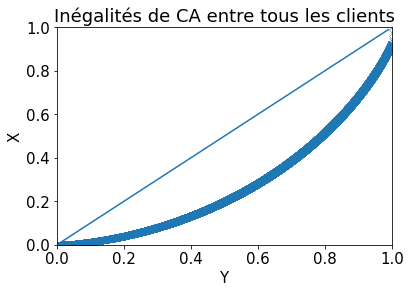

In [100]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incident de Gini :', gini(X))
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    plt.show()
    
# Inégalité des chiffres d'affaires de tous les clients
lorenz(clients_CA['montant_achats'], 'Inégalités de CA entre tous les clients')

## Regarder certaines correlations :
###  Lien entre genre d'un clients et les catégories des livres achetés avec le Test de Chi 2
Le test d'indépendance du χ² mesure la corrélation entre 2 variables qualitatives.

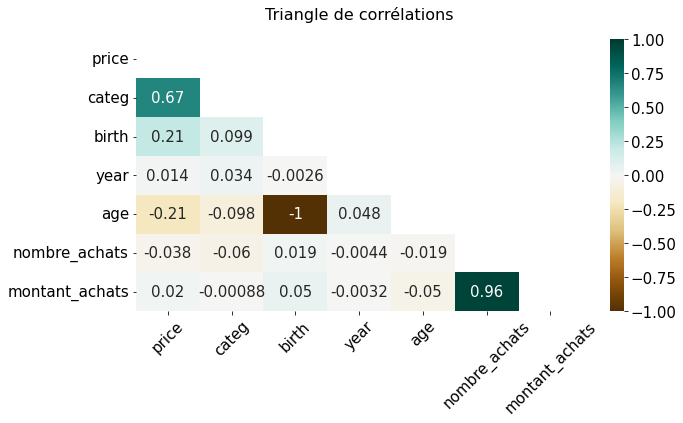

In [101]:
# Triangle de corrélations
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(df.corr(),mask=np.triu(np.ones_like(df.corr(), dtype=bool)), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle de corrélations', fontdict={'fontsize':16}, pad=20)
plt.xticks(rotation=45)
plt.show()

In [102]:
#Générer la contingency table
contingency_tab=pd.crosstab(df['categ'],df['sex'])
contingency_tab

sex,f,m
categ,,
0,206103,209356
1,114899,112270
2,17283,19200


In [103]:
#Transformer en pourcentage
contingency_pct=pd.crosstab(df['categ'],df['sex'],normalize='index')
contingency_pct

sex,f,m
categ,,
0,0.496085,0.503915
1,0.505786,0.494214
2,0.473727,0.526273


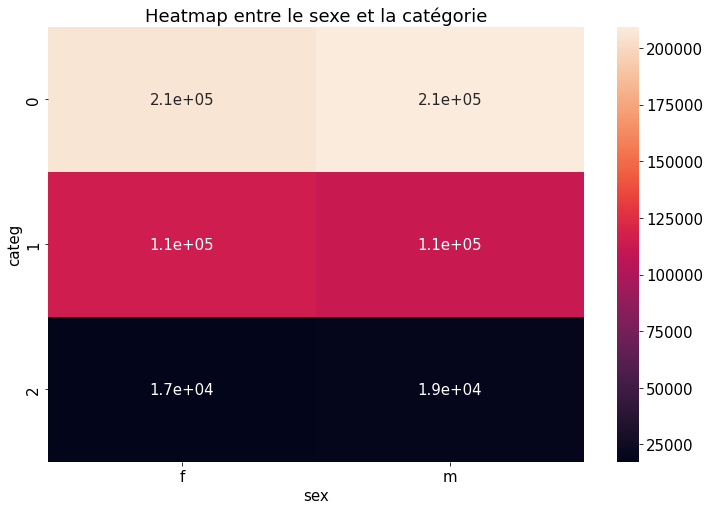

In [104]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(contingency_tab,annot=True)
ylabel='categ'
xlabel='sex'
plt.title('Heatmap entre le sexe et la catégorie')
plt.savefig('heatmap_sexe-categorie.png', dpi=300, bbox_inches='tight')
plt.show()

In [105]:
contingency_tab= pd.crosstab(df['categ'], df['sex'], margins=False)
stat, p, dof, expected = stats.chi2_contingency(contingency_tab)
print('Test de Chi 2 (2 catégorielles)')
print('Stat = %.3f\np-value = %.35f' % (stat, p))
if p > 0.05:
    print('H0: Le genre de clients et les catégories des livres achetés sont independents')
else:
    print('H1: Le genre de clients et les catégories des livres achetés ne sont pas independents')

Test de Chi 2 (2 catégorielles)
Stat = 147.119
p-value = 0.00000000000000000000000000000001131
H1: Le genre de clients et les catégories des livres achetés ne sont pas independents


###  Lien entre l'âge des clients et le montant total des achats, la fréquence d'achat

In [ ]:
#Analyser la corrélation entre l'âge et la prix en fonctionne de fréquence d'achats
sns.scatterplot(data=df,x="age", y="price", hue="categ")
plt.title("Fréquency d'achats en fonction de l'âge et la prix ", fontsize=16),
plt.xlabel("age",fontsize=14)
plt.legend(loc='best')
plt.show()

Les livres de catégorie 2 qui sont des livres plus chers sont presque exclusivement achetée par les moins de 30 ans. Les plus de 70ans ont achetés plutôt les livres des catégories 0 et 1.

### Lien entre l'âge des clients et le montant total des achats avec le Coefficient de corrélation de Pearson, r

In [ ]:
#Coefficient de corrélation linéaire, r prends des valeurs entre -1 et 1. Le signe du coefficient indicate le sens de la relation
r=stats.pearsonr(df['age'],df['montant_achats'])
print(r)

In [ ]:
#L'explication de r
print(f'Il n\'y a pas de corrélation entre l\'âge des clients et le montant total des achats')

### Lien entre les catégories des livres achetés et la fréquence d'achat avec le Test d'ANOVA
#### L'analyse de la variance est utile pour vérifier la corrélation entre une qualitative variable et une quantitative variable 

In [ ]:
#Compter la fréquence des achats
dt_freq=df.groupby(['client_id','categ'])['id_prod'].count().reset_index().rename(columns={'id_prod':'frequence'})
dt_freq

In [ ]:
#!pip statsmodels
import statsmodels.api as sm

In [ ]:
#Télécharger l'ols'(ordinary least squares)function
from statsmodels.formula.api import ols

In [ ]:
#Créer un model avec la fonction 'ols'; Inputer le scale variable suivre par ~ et le nominal variable après adapter
model=ols('categ ~ frequence', data=dt_freq).fit()
aovRes= sm.stats.anova_lm(model, typ=2)
aovRes

In [ ]:
if p > 0.05:
    print('H0: Les moyennes des categ et des frequence sont égal')
else:
    print('H1: Les moyennes des categ et des frequence ne sont pas égal'
         '\n\nConditions :'
         '\n1. Normalité des résidus\n2. Homoscédasticité')

### Le lien entre la taille du panier moyen et les catégories des livres achetés avec le Test d'ANOVA

In [ ]:
#Créer un model avec la fonction 'ols'; Inputer le scale variable suivre par ~ et le nominal variable après adapter
model=ols('price ~ categ', data=df).fit()
aovRes= sm.stats.anova_lm(model, typ=2)
aovRes

In [ ]:
if p > 0.05:
    print('H0: Les moyennes des price et categ sont égal')
else:
    print('H1: Les moyennes des price et categ ne sont pas égal'
         '\n\nConditions :'
         '\n1. Normalité des résidus\n2. Homoscédasticité')